In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))
sys.path.append(parent_dir)
from src.utils import calculate_eer


In [79]:
csv_path = os.path.join(parent_dir, 'data', 'scores', 'facenet_eval_aligned_base_scores.csv')
# csv_path = os.path.join(parent_dir, 'test.csv')

In [80]:
data = pd.read_csv(csv_path)

In [81]:
results_json = {}

Text(0.5, 1.0, 'facenet - same (1) and different (0) people embeddings similarity')

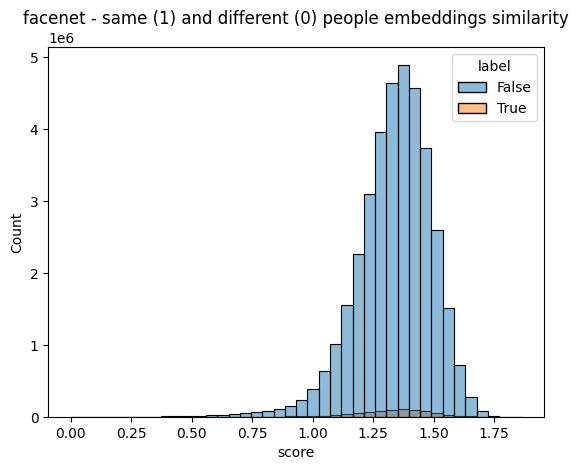

In [82]:
sns.histplot(data = data, x = 'score', hue='label',bins = 40)
plt.title('facenet - same (1) and different (0) people embeddings similarity')

In [83]:
same_person = data[data['label'] == 1]
diff_person = data[data['label'] == 0]

In [84]:
print(f"Same person mean: {same_person['score'].mean()}")
print(f'Same person std: {same_person["score"].std()}')
print(f"Diff person mean: {diff_person['score'].mean()}")
print(f'Diff person std: {diff_person["score"].std()}')

Same person mean: 1.3381645210689024
Same person std: 0.15247508810384114
Diff person mean: 1.3366637677877882
Diff person std: 0.15435876361637293


In [85]:
results_json['eval'] = {}
results_json['eval']['similarity_distribution'] = {}

In [86]:
results_json['eval']['similarity_distribution']['same_person_mean'] = round(same_person['score'].mean(), 6)
results_json['eval']['similarity_distribution']['same_person_std'] = round(same_person['score'].std(), 6)
results_json['eval']['similarity_distribution']['diff_person_mean'] = round(diff_person['score'].mean(), 6)
results_json['eval']['similarity_distribution']['diff_person_std'] = round(diff_person['score'].std(), 6)

In [87]:
results_json

{'eval': {'similarity_distribution': {'same_person_mean': 1.338165,
   'same_person_std': 0.152475,
   'diff_person_mean': 1.336664,
   'diff_person_std': 0.154359}}}

In [88]:
thresholds = np.linspace(0, 1.8, 181)

In [89]:
accs = []
f1s = []
precs = []
recs = []
fars = []
frrs = []

In [90]:
ground_truth = data['label']
for t in thresholds:
    decisions = data['score'] > t
    acc = accuracy_score(ground_truth, decisions)
    f1 = f1_score(ground_truth, decisions)
    prec = precision_score(ground_truth, decisions)
    rec = recall_score(ground_truth, decisions)
    FP = np.sum((ground_truth == 0) & (decisions == 1))
    FN = np.sum((ground_truth == 1) & (decisions == 0))
    TP = np.sum((ground_truth == 1) & (decisions == 1))
    TN = np.sum((ground_truth == 0) & (decisions == 0))
    FAR = FP / (FP + TN)
    FRR = FN / (FN + TP)
    fars.append(FAR)
    frrs.append(FRR)
    accs.append(acc)
    f1s.append(f1)
    precs.append(prec)
    recs.append(rec)
    

In [91]:
threshold, eer = calculate_eer(thresholds, fars, frrs)

In [92]:
print(threshold, eer)

1.352081466900285 0.49804247050459644


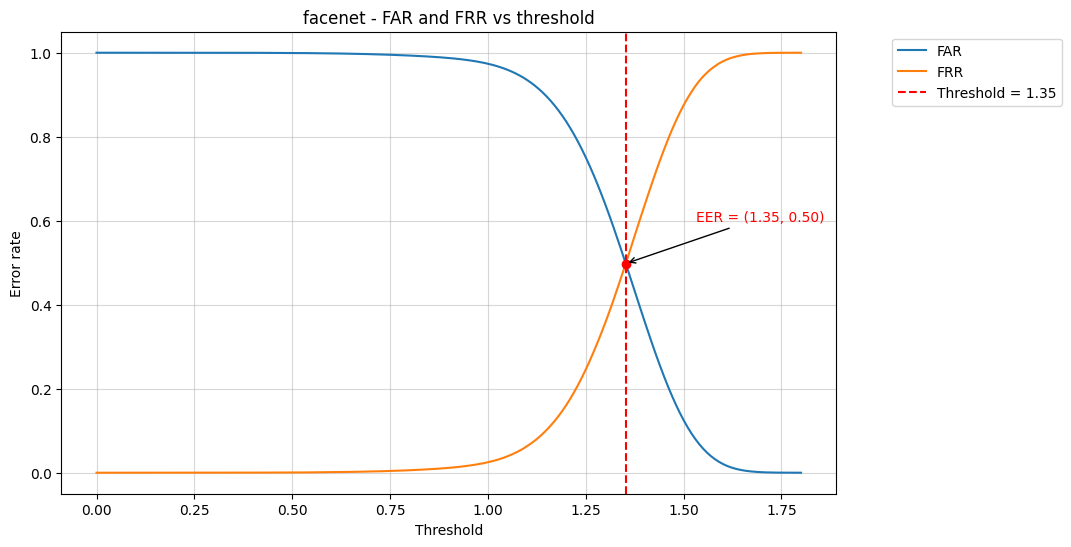

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, fars, label='FAR')
plt.plot(thresholds, frrs, label='FRR')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.2f}')
plt.scatter(threshold, eer, color='red', zorder=2)
plt.annotate(
    f'EER = ({threshold:.2f}, {eer:.2f})', 
    xy=(threshold, eer), 
    xytext=(threshold + np.max(thresholds)/10, eer + 0.1),  # Adjust text position
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=10,
    color='red'
)
plt.title('facenet - FAR and FRR vs threshold')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.grid(alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

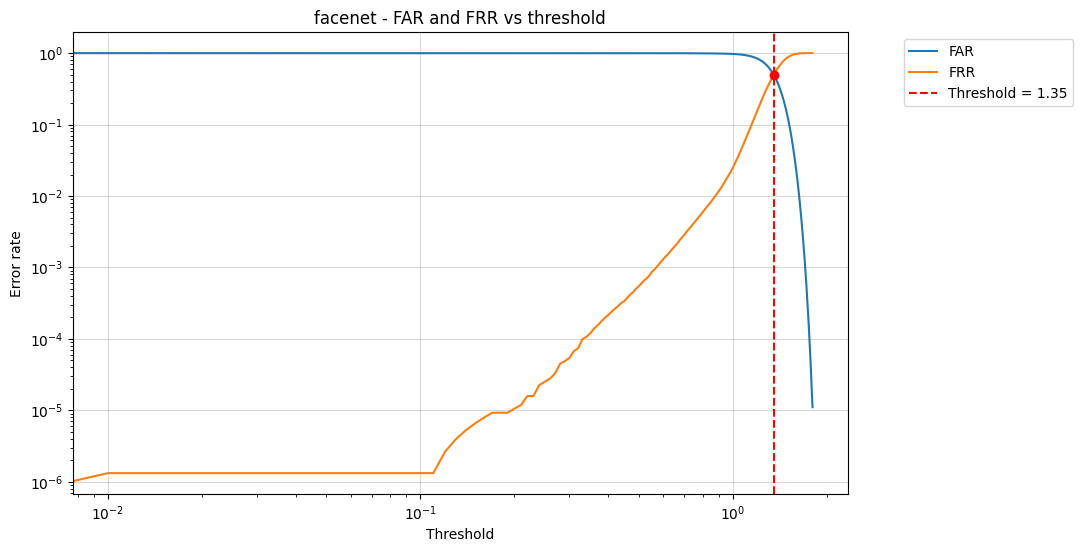

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, fars, label='FAR')
plt.plot(thresholds, frrs, label='FRR')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.2f}')
plt.scatter(threshold, eer, color='red', zorder=2)
plt.title('facenet - FAR and FRR vs threshold')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

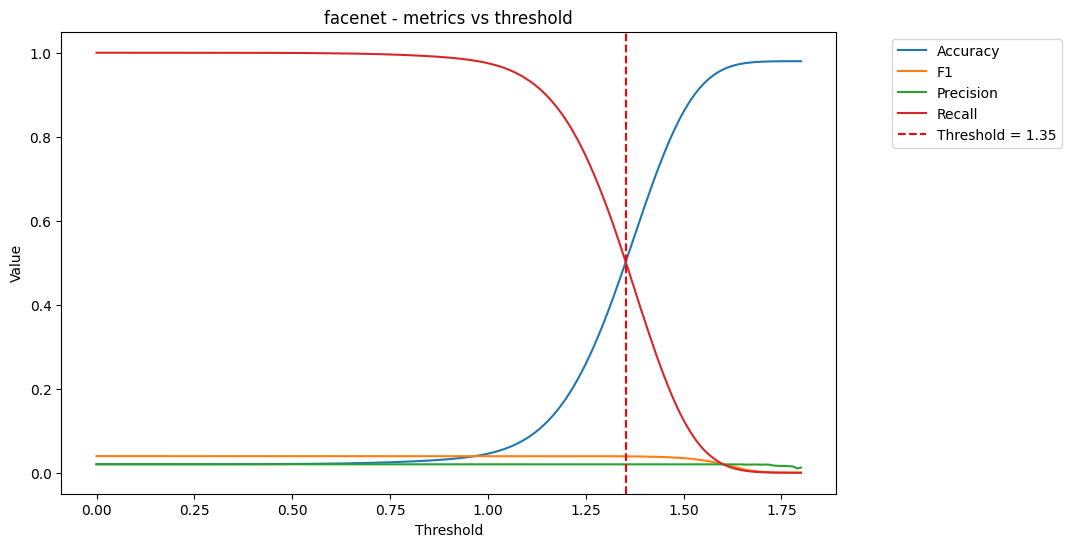

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accs, label='Accuracy')
plt.plot(thresholds, f1s, label='F1')
plt.plot(thresholds, precs, label='Precision')
plt.plot(thresholds, recs, label='Recall')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.2f}')
plt.title('facenet - metrics vs threshold')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

In [96]:
decisions = data['score'] > threshold
acc = accuracy_score(ground_truth, decisions)
f1 = f1_score(ground_truth, decisions)
prec = precision_score(ground_truth, decisions)
rec = recall_score(ground_truth, decisions)
FP = np.sum((ground_truth == 0) & (decisions == 1))
FN = np.sum((ground_truth == 1) & (decisions == 0))
TP = np.sum((ground_truth == 1) & (decisions == 1))
TN = np.sum((ground_truth == 0) & (decisions == 0))
FAR = FP / (FP + TN)
FRR = FN / (FN + TP)
print(f'Accuracy: {round(acc, 5)}')
print(f'F1: {round(f1, 5)}')
print(f'Precision: {round(prec, 5)}')
print(f'Recall: {round(rec, 5)}')
print(f'FAR: {round(FAR, 7)}')
print(f'FRR: {round(FRR, 5)}')

Accuracy: 0.50191
F1: 0.03906
Precision: 0.02032
Recall: 0.50205
FAR: 0.4980881
FRR: 0.49795


In [97]:
results_json 

{'eval': {'similarity_distribution': {'same_person_mean': 1.338165,
   'same_person_std': 0.152475,
   'diff_person_mean': 1.336664,
   'diff_person_std': 0.154359}}}

In [98]:
results_json['eval']['metrics'] = {}
results_json['eval']['metrics']['accuracy'] = round(acc, 6)
results_json['eval']['metrics']['f1'] = round(f1, 6)
results_json['eval']['metrics']['precision'] = round(prec, 6)
results_json['eval']['metrics']['recall'] = round(rec, 6)
results_json['eval']['metrics']['far'] = round(FAR, 6)
results_json['eval']['metrics']['frr'] = round(FRR, 6)
results_json['eval']['metrics']['eer'] = round(eer, 6)
results_json['eval']['threshold'] = round(threshold, 6)

In [99]:
results_json

{'eval': {'similarity_distribution': {'same_person_mean': 1.338165,
   'same_person_std': 0.152475,
   'diff_person_mean': 1.336664,
   'diff_person_std': 0.154359},
  'metrics': {'accuracy': 0.501915,
   'f1': 0.03906,
   'precision': 0.02032,
   'recall': 0.50205,
   'far': 0.498088,
   'frr': 0.49795,
   'eer': 0.498042},
  'threshold': 1.352081}}

## Test

In [100]:
csv_path = os.path.join(parent_dir, 'data', 'scores', 'facenet_test_aligned_base_scores.csv')
data = pd.read_csv(csv_path)

In [101]:
ground_truth = data['label']

In [102]:
decisions = data['score'] > threshold
acc = accuracy_score(ground_truth, decisions)
f1 = f1_score(ground_truth, decisions)
prec = precision_score(ground_truth, decisions)
rec = recall_score(ground_truth, decisions)
FP = np.sum((ground_truth == 0) & (decisions == 1))
FN = np.sum((ground_truth == 1) & (decisions == 0))
TP = np.sum((ground_truth == 1) & (decisions == 1))
TN = np.sum((ground_truth == 0) & (decisions == 0))
FAR = FP / (FP + TN)
FRR = FN / (FN + TP)
print(f'Accuracy: {round(acc, 5)}')
print(f'F1: {round(f1, 5)}')
print(f'Precision: {round(prec, 5)}')
print(f'Recall: {round(rec, 5)}')
print(f'FAR: {round(FAR, 7)}')
print(f'FRR: {round(FRR, 5)}')

Accuracy: 0.45838
F1: 0.03868
Precision: 0.02006
Recall: 0.54195
FAR: 0.5433309
FRR: 0.45805


In [103]:
results_json['test'] = {}
results_json['test']['metrics'] = {}
results_json['test']['metrics']['accuracy'] = round(acc, 6)
results_json['test']['metrics']['f1'] = round(f1, 6)
results_json['test']['metrics']['precision'] = round(prec, 6)
results_json['test']['metrics']['recall'] = round(rec, 6)
results_json['test']['metrics']['far'] = round(FAR, 6)
results_json['test']['metrics']['frr'] = round(FRR, 6)

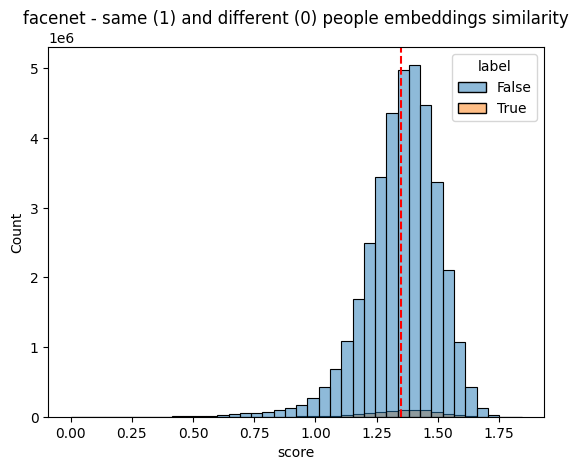

In [104]:
sns.histplot(data = data, x = 'score', hue='label',bins = 40)
plt.title('facenet - same (1) and different (0) people embeddings similarity')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.2f}')

In [105]:
same_person = data[data['label'] == 1]
diff_person = data[data['label'] == 0]

In [106]:
results_json['test']['similarity_distribution'] = {}

In [107]:
results_json['test']['similarity_distribution']['same_person_mean'] = round(same_person['score'].mean(), 6)
results_json['test']['similarity_distribution']['same_person_std'] = round(same_person['score'].std(), 6)
results_json['test']['similarity_distribution']['diff_person_mean'] = round(diff_person['score'].mean(), 6)
results_json['test']['similarity_distribution']['diff_person_std'] = round(diff_person['score'].std(), 6)

In [108]:
fars=[]
frrs=[]
ground_truth = data['label']
for t in thresholds:
    decisions = data['score'] > t
    FP = np.sum((ground_truth == 0) & (decisions == 1))
    FN = np.sum((ground_truth == 1) & (decisions == 0))
    TP = np.sum((ground_truth == 1) & (decisions == 1))
    TN = np.sum((ground_truth == 0) & (decisions == 0))
    FAR = FP / (FP + TN)
    FRR = FN / (FN + TP)
    fars.append(FAR)
    frrs.append(FRR)


In [109]:
_, eer = calculate_eer(thresholds, fars, frrs)

In [110]:
results_json['test']['metrics']['eer'] = round(eer, 6)

In [111]:
results_json

{'eval': {'similarity_distribution': {'same_person_mean': 1.338165,
   'same_person_std': 0.152475,
   'diff_person_mean': 1.336664,
   'diff_person_std': 0.154359},
  'metrics': {'accuracy': 0.501915,
   'f1': 0.03906,
   'precision': 0.02032,
   'recall': 0.50205,
   'far': 0.498088,
   'frr': 0.49795,
   'eer': 0.498042},
  'threshold': 1.352081},
 'test': {'metrics': {'accuracy': 0.458384,
   'f1': 0.038684,
   'precision': 0.020058,
   'recall': 0.541953,
   'far': 0.543331,
   'frr': 0.458047,
   'eer': 0.500404},
  'similarity_distribution': {'same_person_mean': 1.350581,
   'same_person_std': 0.151301,
   'diff_person_mean': 1.351112,
   'diff_person_std': 0.149607}}}

In [112]:
import json
with open(f"{parent_dir}/results/facenet_aligned.json", "w") as outfile:
    json.dump(results_json, outfile)